In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
start = '2010-01-01'
end = '2020-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444379
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [3]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679642
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873108
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.731583
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709198


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444379
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


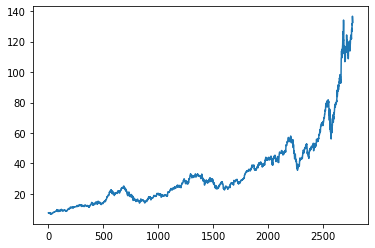

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2765,133.460007,131.100006,131.320007,131.970001,54930100.0
2766,137.339996,133.509995,133.990005,136.690002,124486200.0
2767,138.789993,134.339996,138.050003,134.869995,121047300.0
2768,135.990005,133.399994,135.580002,133.720001,96452100.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    118.223525
2766    118.489800
2767    118.699475
2768    118.925550
2769    119.125175
Name: Close, Length: 2770, dtype: float64

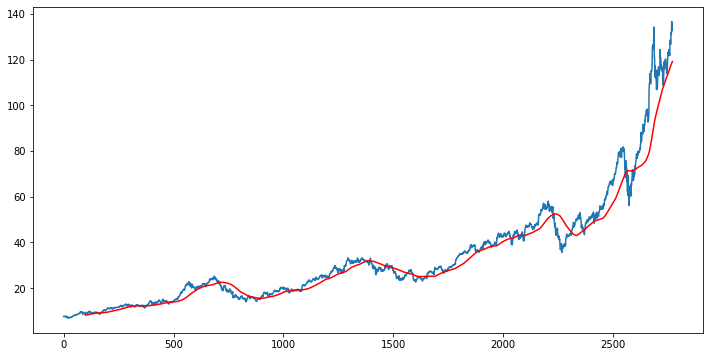

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765     99.158737
2766     99.494725
2767     99.866312
2768    100.218837
2769    100.573950
Name: Close, Length: 2770, dtype: float64

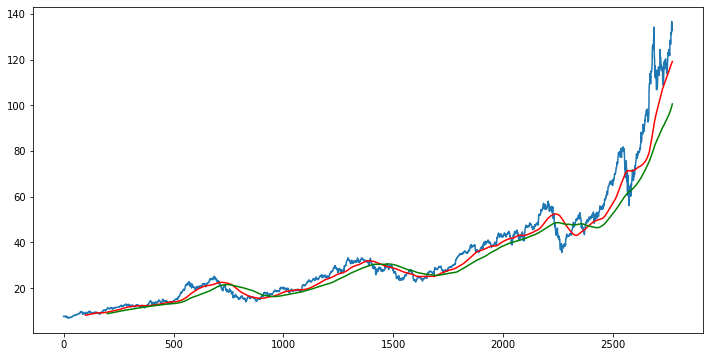

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200, 'g')

In [12]:
df.shape


(2770, 5)

In [13]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [18]:
data_training_array.shape

(1938, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [20]:
# ML Model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [50]:
pip install keras


  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)


In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [29]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 22s 208ms/step - loss: 0.0617
Epoch 2/50
58/58 [==============================] - 12s 206ms/step - loss: 0.0092
Epoch 3/50
58/58 [==============================] - 12s 206ms/step - loss: 0.0072
Epoch 4/50
58/58 [==============================] - 14s 237ms/step - loss: 0.0066
Epoch 5/50
58/58 [==============================] - 14s 236ms/step - loss: 0.0061
Epoch 6/50
58/58 [==============================] - 14s 238ms/step - loss: 0.0062
Epoch 7/50
58/58 [==============================] - 14s 244ms/step - loss: 0.0061
Epoch 8/50
58/58 [==============================] - 14s 242ms/step - loss: 0.0055
Epoch 9/50
58/58 [==============================] - 14s 237ms/step - loss: 0.0053
Epoch 10/50
58/58 [==============================] - 14s 237ms/step - loss: 0.0056
Epoch 11/50
58/58 [==============================] - 14s 238ms/step - loss: 0.0056
Epoch 12/50
58/58 [==============================] - 14s 244ms/step - loss: 0.0050
Epoch 13/50
5

In [30]:
model.save('keras_model.h5')